In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS, summarize, poly, sklearn_sm, Stepwise, sklearn_selected, sklearn_selection_path)
from functools import partial
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [3]:
from sklearn.svm import SVC, SVR
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [4]:
roc_curve = RocCurveDisplay.from_estimator

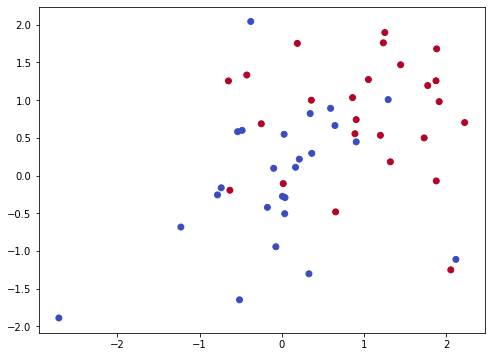

In [5]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25 + [1]*25)
X[y==1] += 1
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

In [6]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

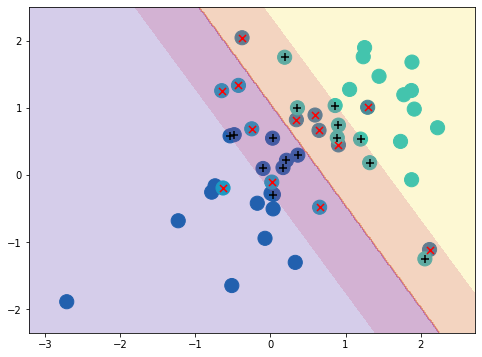

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X, y, svm_linear, ax=ax)

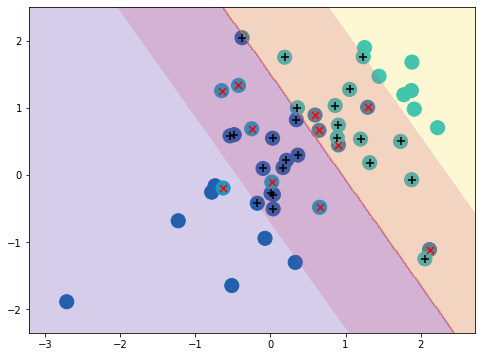

In [8]:
svm_linear = SVC(C=0.1, kernel='linear')
svm_linear.fit(X, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X, y, svm_linear, ax=ax)

In [11]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test==1] += 1

In [12]:
svm_linear = SVC(C=1, kernel='linear')
svm_linear.fit(X, y)

SVC(C=1, kernel='linear')

In [13]:
y_hat = svm_linear.predict(X_test)
confusion_table(y_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,3
1,2,7
